SURF

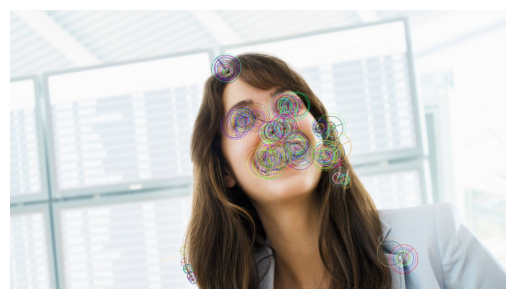

In [15]:
import cv2
import matplotlib.pyplot as plt

def process_image(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Initialize the ORB detector
    orb = cv2.ORB_create()

    # Detect keypoints and compute descriptors
    keypoints, descriptors = orb.detectAndCompute(gray, None)

    # Draw keypoints on the image
    img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Convert BGR image to RGB for matplotlib
    img_with_keypoints_rgb = cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB)

    # Display the image with keypoints using plt.imshow()
    plt.imshow(img_with_keypoints_rgb)
    plt.axis('off')
    plt.show()

def process_video(video_path):
    cap = cv2.VideoCapture(video_path)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Initialize the ORB detector
        orb = cv2.ORB_create()

        # Detect keypoints and compute descriptors
        keypoints, descriptors = orb.detectAndCompute(gray, None)

        # Draw keypoints on the frame
        frame_with_keypoints = cv2.drawKeypoints(frame, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

        # Display the frame with keypoints using cv2.imshow()
        cv2.imshow('ORB Keypoints', frame_with_keypoints)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    # Process images
    process_image('getty_107808334_121413.jpg')

    # Process video
    process_video('ladies.mp4')

HARRIS CORNER

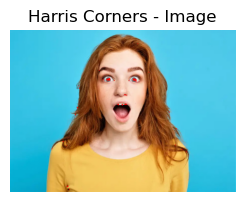

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_corners(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect Harris corners
    dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

    # Dilate corner points to make them more visible
    dst = cv2.dilate(dst, None)

    # Threshold for an optimal value, it may vary depending on the image
    image_with_corners = np.copy(image)
    image_with_corners[dst > 0.01 * dst.max()] = [0, 0, 255]  # Red color for detected corners

    return image_with_corners

# Load and process the first image
img1 = cv2.imread('girl.jpg')
img1_corners = detect_corners(img1)

# Display the results for images using plt.imshow()
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1_corners, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Harris Corners - Image')

plt.show()

# Process the video
cap = cv2.VideoCapture('santosh.mp4')

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Detect corners for the current frame
    frame_corners = detect_corners(frame)

    # Display the result for the video frame using cv2.imshow()
    cv2.imshow('Harris Corners - Video', frame_corners)

    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

GLOH

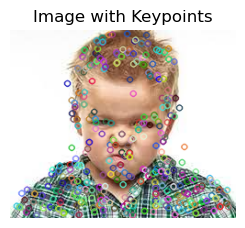

In [18]:
import cv2
import matplotlib.pyplot as plt

def detect_features(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Find keypoints and descriptors
    keypoints, descriptors = sift.detectAndCompute(gray, None)

    return keypoints, descriptors

# Load images
img1 = cv2.imread('images.jpg')

# Load video
video_cap = cv2.VideoCapture('gowtham.mp4')

# Process images
keypoints1, descriptors1 = detect_features(img1)

# Draw keypoints on images
img1_with_keypoints = cv2.drawKeypoints(img1, keypoints1, None)

# Display images with detected keypoints using plt.imshow()
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1_with_keypoints, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Image with Keypoints')

plt.show()

# Process video
while video_cap.isOpened():
    ret, frame = video_cap.read()
    if not ret:
        break

    # Detect features in the video frame
    frame_keypoints, frame_descriptors = detect_features(frame)

    # Draw keypoints on the video frame
    frame_with_keypoints = cv2.drawKeypoints(frame, frame_keypoints, None)

    # Display the video frame with detected keypoints using cv2.imshow()
    cv2.imshow('Video Frame with Keypoints', frame_with_keypoints)

    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Release the video capture object
video_cap.release()
cv2.destroyAllWindows()

SIFT

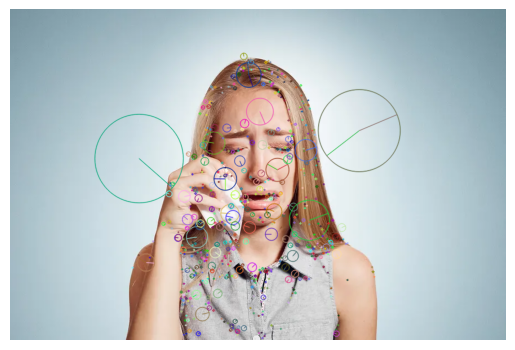

In [19]:
import cv2
import matplotlib.pyplot as plt

# Function to draw SIFT keypoints on an image
def draw_sift_keypoints(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints and compute descriptors
    keypoints, _ = sift.detectAndCompute(gray, None)

    # Draw keypoints on the image
    image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Convert BGR image to RGB for matplotlib
    image_with_keypoints_rgb = cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB)

    # Display the image with keypoints using matplotlib
    plt.imshow(image_with_keypoints_rgb)
    plt.axis('off')
    plt.show()

# Draw SIFT keypoints on all the images
draw_sift_keypoints('breakup-woman-sad.jpg')

# Initialize video capture
video_capture = cv2.VideoCapture('rishik.mp4')

# Initialize SIFT detector
sift = cv2.SIFT_create()

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    if not ret:
        break

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect keypoints and compute descriptors
    keypoints, _ = sift.detectAndCompute(gray, None)

    # Draw keypoints on the frame
    frame_with_keypoints = cv2.drawKeypoints(frame, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Display the frame with keypoints
    cv2.imshow('Video with SIFT keypoints', frame_with_keypoints)

    # If the 'q' key is pressed, break the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
video_capture.release()
cv2.destroyAllWindows()